# Heart Disease Prediction using ML Techniques.

## About the Dataset
This datast contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
 <br>For reference [click here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

# Data Exploration

In [87]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('heart.csv')

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [91]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


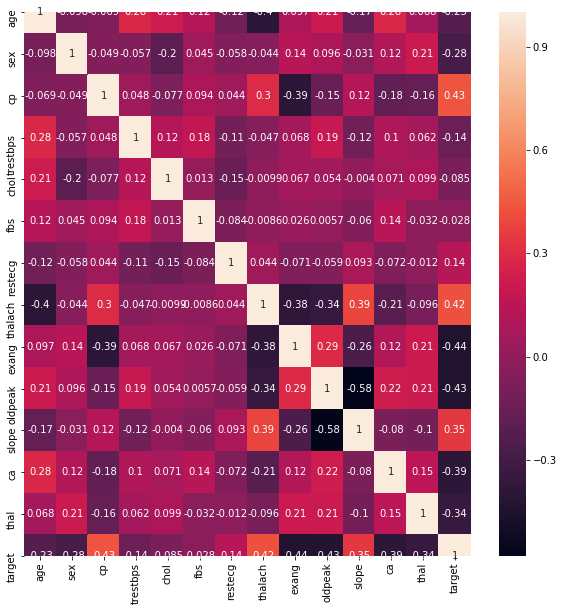

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [93]:
#age analysis
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

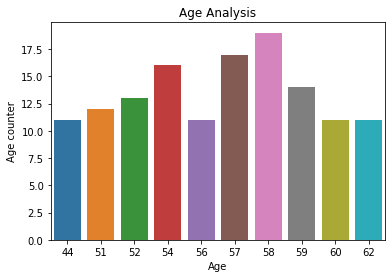

In [94]:
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [95]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [112]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients that don't have heart disease : {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients that have heart disease  : {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients that don't have heart disease : 45.54%
Percentage of patients that have heart disease  : 54.46%


In [97]:
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print(" Percentage of Female Patients : {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("Percentage of Male Patients : {:.2f}%".format((countMale/(len(df.sex))*100)))

 Percentage of Female Patients : 31.68%
Percentage of Male Patients : 68.32%


In [98]:
young_age = df[(df.age>=29)&(df.age<40)]
middle_age = df[(df.age>=40)&(df.age<55)]
elderly_age = df[(df.age>=55)]
print("Patients of Young age", len(young_age))
print("Patients of middle age", len(middle_age))
print("Patients of elderly age", len(elderly_age))

Patients of Young age 16
Patients of middle age 128
Patients of elderly age 159


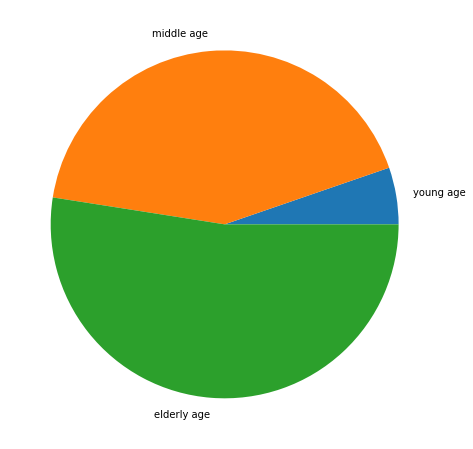

In [99]:
colors = ['blue','green', 'cyan']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_age), len(middle_age), len(elderly_age)], labels=['young age', 'middle age', 'elderly age'])
plt.show()

In [100]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [101]:
df.target.unique()

array([1, 0], dtype=int64)

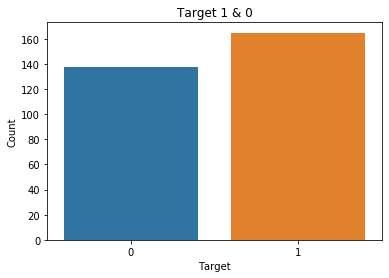

In [102]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [103]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Building the model

In [104]:
X_data = df.drop(['target'], axis = 1)
y = df.target.values

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state= 0)

In [106]:
# SHAPE OF TRAINING AND TESTING DATA
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [107]:
# Importing packages and functions required for fitting different models to the data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


# Importing functions to get the model fitting for the data 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix  
from sklearn.model_selection import cross_val_score

In [108]:
# Fitting all the models at the same time using 'for' loop
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
acc=[]

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train,y_train)
    y_pred=classification_model.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test))
    print("\n\n","confusion matrix of",model_names[model],"is ","\n",confusion_matrix(y_test,y_pred))  
d={'Modelling Algorithm':model_names,'Accuracy':acc}
acc_table=pd.DataFrame(d)
acc_table



 confusion matrix of LogisticRegression is  
 [[21  6]
 [ 3 31]]


 confusion matrix of LinearSVM is  
 [[ 2 25]
 [ 0 34]]


 confusion matrix of rbfSVM is  
 [[ 2 25]
 [ 0 34]]


 confusion matrix of KNearestNeighbors is  
 [[19  8]
 [13 21]]


 confusion matrix of GaussianNB is  
 [[21  6]
 [ 3 31]]


 confusion matrix of DecisionTree is  
 [[22  5]
 [ 8 26]]


 confusion matrix of RandomForestClassifier is  
 [[21  6]
 [ 4 30]]


 confusion matrix of GradientBoostingClassifier is  
 [[21  6]
 [ 6 28]]


,Modelling Algorithm,Accuracy
0,LogisticRegression,0.852459
1,LinearSVM,0.590164
2,rbfSVM,0.590164
3,KNearestNeighbors,0.655738
4,GaussianNB,0.852459
5,DecisionTree,0.786885
6,RandomForestClassifier,0.836066
7,GradientBoostingClassifier,0.803279


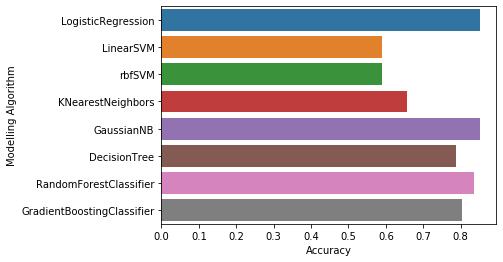

In [109]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)


In [110]:
#Finding 10 fold cross validation scores for all the models at the same time using 'for' loop 
models=[LogisticRegression(multi_class="multinomial",solver="newton-cg"),
        LinearSVC(),
        SVC(kernel='rbf',gamma="auto"),
        KNeighborsClassifier(n_neighbors=10,metric="euclidean"),
        GaussianNB(),
        DecisionTreeClassifier(criterion="gini",max_depth=10),
        RandomForestClassifier(n_estimators=100),
        GradientBoostingClassifier()
        ]
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'GaussianNB',
             'DecisionTree',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             ]
cvs=[]
for model in range(len(models)):
    classification_model=models[model]
    clf=classification_model.fit(X_train,y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=10)
    scores.mean()
    print(model_names[model]," 10 fold cross validation score == ",scores.mean(),"  \n\n")

LogisticRegression  10 fold cross validation score ==  0.8280952380952382   


LinearSVM  10 fold cross validation score ==  0.6976190476190476   


rbfSVM  10 fold cross validation score ==  0.5585714285714285   


KNearestNeighbors  10 fold cross validation score ==  0.6742857142857142   


GaussianNB  10 fold cross validation score ==  0.7985714285714285   


DecisionTree  10 fold cross validation score ==  0.6776190476190476   


RandomForestClassifier  10 fold cross validation score ==  0.832857142857143   


GradientBoostingClassifier  10 fold cross validation score ==  0.7685714285714285   




### For Prediction we are taking values in the dataset itself and checking whether our model works 

| age | sex| cp| trestbps| chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | target |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 52 | 1 | 2 | 172 | 199 | 1 | 1 | 162 | 0 | 0.5 | 2 | 0 | 3 | 1 |

#### by giving this to the models we need to get   "1"    in our Predicted value.

In [111]:
new_obs=[[52,1,2,172,199,1,1,162,0,0.5,2,0,3]]
pv=[]
for model in range(len(models)):
    classification_model=models[model]
    models[model].predict(new_obs)
    pv.append(models[model].predict(new_obs))
    
d={'Modelling Algorithm':model_names,'Predicted value':pv}
pred_table=pd.DataFrame(d)
pred_table


,Modelling Algorithm,Predicted value
0,LogisticRegression,[1]
1,LinearSVM,[0]
2,rbfSVM,[1]
3,KNearestNeighbors,[0]
4,GaussianNB,[1]
5,DecisionTree,[1]
6,RandomForestClassifier,[1]
7,GradientBoostingClassifier,[1]


### ALL MODEL PREDICTS PERFECTLY EXCEPT LINEAR & KNEAREST NEIGHBORS.